In [1]:
import os 
import pandas as pd 
import dataPrep as dP 
import matplotlib.pyplot as plt 
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


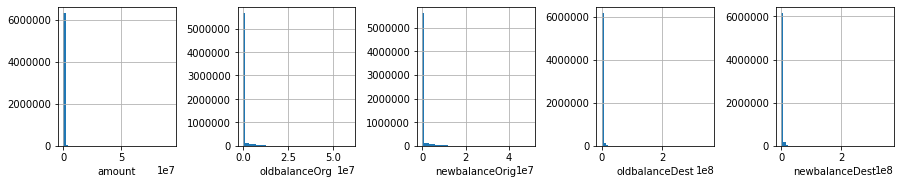

In [2]:
#Get the data and visualize them prior to transformation
x_train,targetsActual,targetsFlagged = dP.getData()
#print(x_train.info())
plt.figure(1,figsize = (50,50))
i = 1; nrows = 20; ncols = 20
for col in x_train.columns:
    if col in ['step','nameOrig','nameDest','type']:
        continue
    plt.subplot(nrows,ncols,i)
    x_train[col].hist(bins = 50)
    plt.xlabel(col)
    i += 1
plt.tight_layout()
plt.show()    

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest     Logamount  LogoldbalanceOrg  \
count    6.362620e+06    6.362620e+06  6.362620e+06      6.362620e+06   
mean     1.100702e+06    1.224996e+06  1.084087e+01      7.414574e+00   
std      3.399180e+06    3.674129e+06  1.814509e+00      5.669756e+00   
min      0.000000e+00    0.000000e+00  0.000000e+00      0.000000e+00   
25%      0.000000e+00 

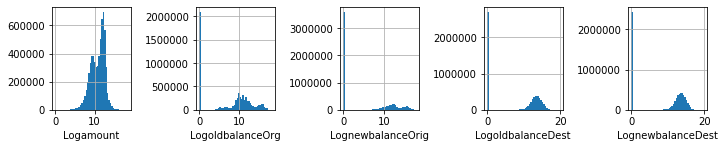

In [3]:
#Transform and look at the values
import numpy as np
def logx(x):
    return np.log(1 + x)
for col in x_train.columns:
    if col in ['step','nameOrig','nameDest','type']:
        continue
    x_train['Log' + col] = x_train[col].apply(logx)
print(x_train.describe())
x_train.drop(columns = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],inplace = True)
plt.figure(1,figsize = (50,50))
i = 1; nrows = 25; ncols = 25
for col in x_train.columns:
    if 'Log' not in col:
        continue 
    plt.subplot(nrows,ncols,i)
    x_train[col].hist(bins = 50)
    plt.xlabel(col)
    i += 1
plt.tight_layout()
plt.show()

In [4]:
#Normalize the numerical features after log transformation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numericalColumns = ['Amount','OldBalanceOrig','NewBalanceOrig','OldBalanceDest','NewBalanceDest']
logColumns = ['Logamount','LogoldbalanceOrg','LognewbalanceOrig','LogoldbalanceDest','LognewbalanceDest']
x_train[logColumns] = scaler.fit_transform(x_train[logColumns])
x_train.rename(columns = {'Logamount':'Amount','LogoldbalanceOrg':'OldBalanceOrig','LognewbalanceOrig':'NewBalanceOrig','LogoldbalanceDest':'OldBalanceDest','LognewbalanceDest':'NewBalanceDest'},inplace = True)
x_train.info()
x_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   nameOrig        object 
 3   nameDest        object 
 4   Amount          float64
 5   OldBalanceOrig  float64
 6   NewBalanceOrig  float64
 7   OldBalanceDest  float64
 8   NewBalanceDest  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 436.9+ MB


,step,Amount,OldBalanceOrig,NewBalanceOrig,OldBalanceDest,NewBalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,5.910368e-01,4.141545e-01,3.028405e-01,3.921904e-01,4.230678e-01
std,1.423320e+02,9.892578e-02,3.166946e-01,3.572410e-01,3.426852e-01,3.389931e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,5.180590e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,6.118999e-01,5.340823e-01,0.000000e+00,5.990658e-01,6.234755e-01
75%,3.350000e+02,6.677938e-01,6.470195e-01,6.704235e-01,6.986553e-01,7.070047e-01
max,7.430000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
#Import one model and train 
from sklearn.model_selection import train_test_split
x_train.rename(columns = {'step':'Step','type':'Type'},inplace = True)
x_train.drop(columns = ['nameOrig','nameDest'],inplace = True)
xTrainFinal = pd.get_dummies(x_train,columns = ['Type'])
xTrainFinal.info()
xTrainFinal.describe()
x_train,x_test,y_train,y_test = train_test_split(xTrainFinal,targetsActual,test_size = 0.25,random_state = 42)
print("Number of fraudulent transactions: {}".format(len(targetsActual[targetsActual == 1])))
print("Number of non-fraudulent transactions: {}".format(len(targetsActual[targetsActual == 0])))
del xTrainFinal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Step            int64  
 1   Amount          float64
 2   OldBalanceOrig  float64
 3   NewBalanceOrig  float64
 4   OldBalanceDest  float64
 5   NewBalanceDest  float64
 6   Type_CASH_IN    uint8  
 7   Type_CASH_OUT   uint8  
 8   Type_DEBIT      uint8  
 9   Type_PAYMENT    uint8  
 10  Type_TRANSFER   uint8  
dtypes: float64(5), int64(1), uint8(5)
memory usage: 321.6 MB
Number of fraudulent transactions: 8213
Number of non-fraudulent transactions: 6354407


In [16]:
#Train one model and then try on a few more 
from sklearn.metrics import accuracy_score,fbeta_score
from sklearn.tree import DecisionTreeClassifier
from time import time 
dtc = DecisionTreeClassifier(random_state=0)
results = {}
start = time()
learner = dtc.fit(x_train,y_train)
end = time()
results['training_time'] = end - start

start = time()
predictions_test = learner.predict(x_test)
end = time()
results['testing_time'] = end - start
results['acc_test'] = accuracy_score(y_test, predictions_test)
results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
print(results)

{'training_time': 71.97361207008362, 'testing_time': 0.2699007987976074, 'acc_test': 0.9997258990793101, 'f_test': 0.8994100589941006}


In [6]:
#Start by measuring the accuracy and fScore present. 
from sklearn.metrics import fbeta_score,accuracy_score
initial_acc = accuracy_score(targetsActual,targetsFlagged)
initial_fScore = fbeta_score(targetsActual,targetsFlagged, beta=0.5)
print("Initial accuracy: {}".format(initial_acc))
print("Initial F-score: {}".format(initial_fScore))
print("Number of flagged fraudulent transactions: {}".format(len(targetsFlagged[targetsFlagged == 1])))

The accuracy present here: 0.9987116942391656
Number of flagged fraudulent transactions: 16


GaussianNB trained on 4771965 samples.
KNeighborsClassifier trained on 4771965 samples.


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC trained on 4771965 samples.


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression trained on 4771965 samples.
GradientBoostingClassifier trained on 4771965 samples.
[0.008598104109428538, 0.8775161163004869, 0.0, 0.7677997632335533, 0.8084596967278532]
[2.2382500171661377, 861.6082780361176, 1423.3665528297424, 50.67125391960144, 1493.7298777103424]
[0.819117281874448, 0.9995184373732834, 0.9987143660944705, 0.9992481084836121, 0.9993248064476583]
['GaussianNB', 'KNeighbors', 'LinearSVC', 'LogisticRegression', 'GradientBoosting']


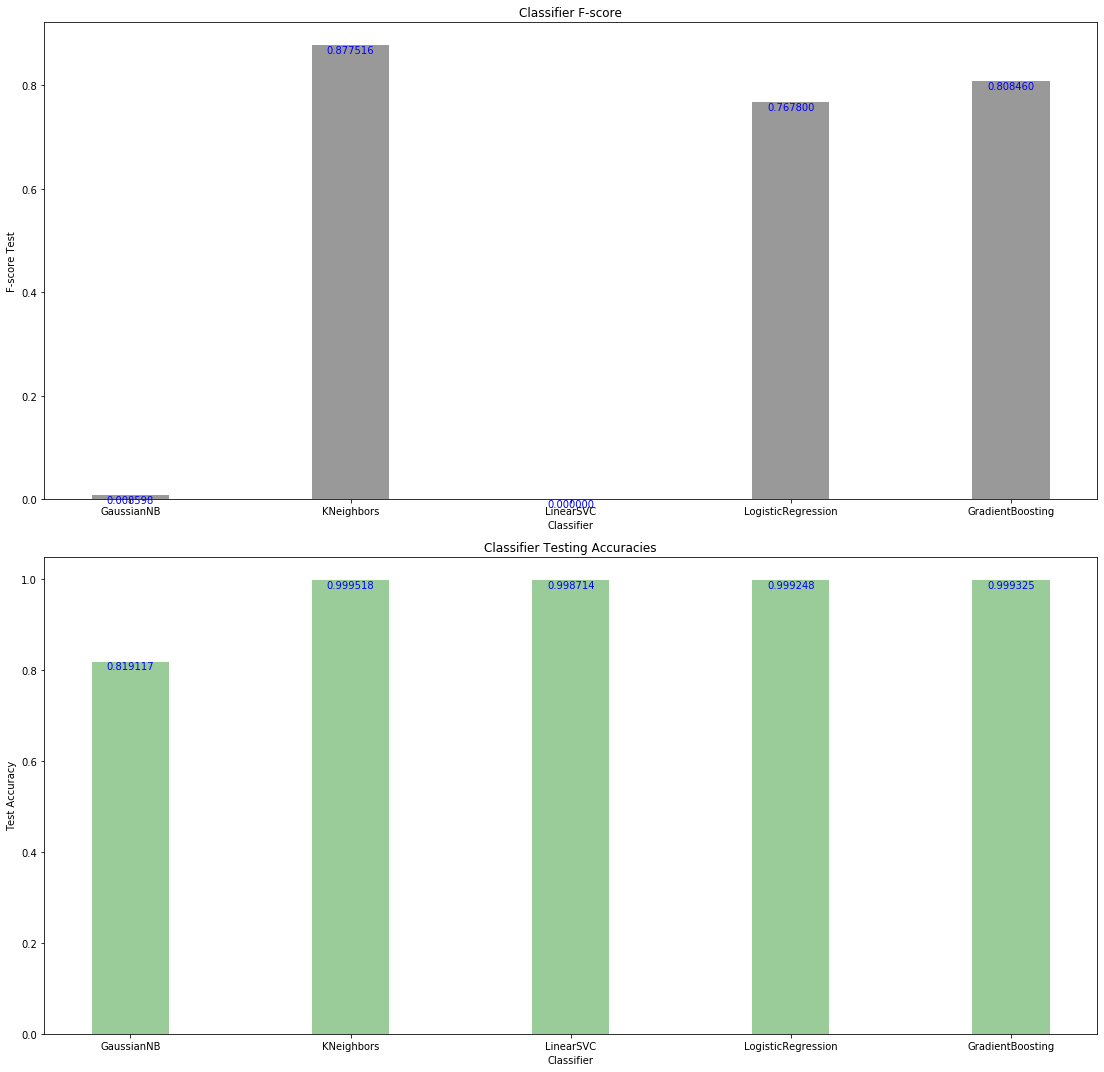

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from time import time

del targetsActual,targetsFlagged
gnb = GaussianNB()
#rfc = RandomForestClassifier(random_state=42, n_jobs=2)
knn = KNeighborsClassifier(n_jobs=2)
lreg = LogisticRegression(random_state=42)
lsvc = LinearSVC(random_state=42)
gdb = GradientBoostingClassifier(random_state=42)
classifiersList = [gnb,knn,lsvc,lreg,gdb]
classifiersScores = []
classifiersTrainTimes = []

def trainPredict(model,sampleSize,x_train,y_train,x_test,y_test):
    '''
    model: The algorithm
    sampleSize: The size of samples to draw from
    x_train: Training dataset
    y_train: Labels 
    x_test: Test set
    y_test: Test labels
    '''
    results = {}
    #Training the model 
    start = time()
    learner = model.fit(x_train[:sampleSize],y_train[:sampleSize])
    end = time()
    results['training_time'] = end - start
    
    #Predictions 
    start = time()
    predictions_test = learner.predict(x_test)
    end = time()
    results['testing_time'] = end - start
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    print ("{} trained on {} samples.".format(model.__class__.__name__, sampleSize))
    results['clf_name'] = model.__class__.__name__
    return results

#Create lists to store selected benchmarking results
clf_lscores = []
clf_ltrain_times = []
clf_lnames = []
clf_testAccuracies = []

for model in classifiersList:
    #Train the various models on the same set of data to compare and choose the best model
    clfResults = trainPredict(model,len(y_train),x_train,y_train,x_test,y_test)
    clf_lscores.append(clfResults['f_test'])
    clf_ltrain_times.append(clfResults['training_time'])
    clf_testAccuracies.append(clfResults['acc_test'])
    clf_lnames.append(clfResults['clf_name'].replace('Classifier', ''))
print(clf_lscores)
print(clf_ltrain_times)
print(clf_testAccuracies)
print(clf_lnames)

#Plot the results using the metrics obtained 
plt.figure(1,figsize = (45,15))
nGroups = len(clf_lscores)
index = np.arange(nGroups)
barWidth = 0.35
opacity = 0.4
data1 = clf_lscores
data2 = clf_testAccuracies 
plt.subplot(2,3,1)
plt.xlabel('Classifier')
plt.ylabel('F-score Test')
plt.title('Classifier F-score')
plt.xticks(index, clf_lnames)
bar1 = plt.bar(index, data1, barWidth, alpha=opacity, color='k')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.subplot(2,3,4)
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.title('Classifier Testing Accuracies')
plt.xticks(index, clf_lnames)
bar2 = plt.bar(index, data2, barWidth, alpha=opacity, color='g')
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.tight_layout()
plt.show()